# Covid Data

This uses a covid dataset for Alberta, Canada

I'm just messing around with it so that I can learn data wrangling techniques in python. Maybe I'll do some classification problems but idk

Currently uses pandas, numpy, matplotlib...yeah

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cov = pd.read_csv('data/alberta0522.csv')
vac = pd.read_csv('data/vac0522.csv')

In [4]:
cov.columns

Index(['Unnamed: 0', 'Date reported', 'Alberta Health Services Zone', 'Gender',
       'Age group', 'Case status', 'Case type'],
      dtype='object')

In [5]:
# Drop the built-in index column
cov = cov.drop(['Unnamed: 0'], axis=1)

In [6]:
cov['Date reported'].head()

0    2020-11-13
1    2021-01-03
2    2021-04-21
3    2021-05-17
4    2020-12-13
Name: Date reported, dtype: object

In [7]:
cov['Date reported'] = pd.to_datetime(cov['Date reported'], format='%Y-%m-%d')

In [8]:
cov.head()

,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
1,2021-01-03,Calgary Zone,Female,5-9 years,Recovered,Confirmed
2,2021-04-21,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
3,2021-05-17,North Zone,Male,10-19 years,Active,Confirmed
4,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed


In [9]:
cov['Case type'].value_counts()

Confirmed    221804
Probable       2391
Name: Case type, dtype: int64

In [10]:
# bad variable names but its ok
a = cov.resample('W', on='Date reported').count().cumsum()

In [11]:
b = cov.resample('2W', on='Date reported').count()

In [12]:
a = a['Case type']

In [13]:
b = b['Case type']
b.head()

Date reported
2020-03-08       1
2020-03-22     291
2020-04-05     986
2020-04-19    1422
2020-05-03    2941
Freq: 2W-SUN, Name: Case type, dtype: int64

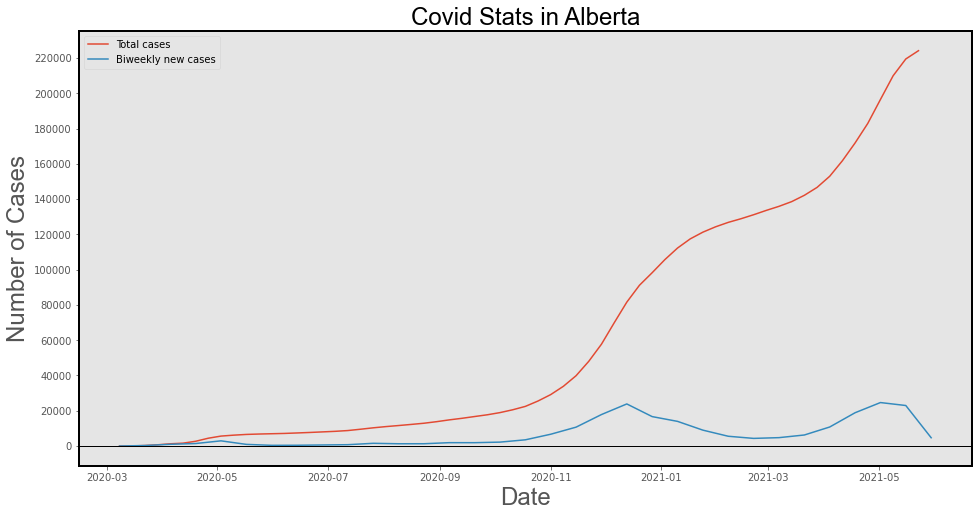

In [14]:
# Time to plot data. This is basically the covid data found at 
# https://www.alberta.ca/stats/covid-19-alberta-statistics.htm#total-cases

# However, it looks kind of weird because I simply plotted biweekly new cases,
# assuming patients would recover in two weeks, instead of "active cases"
# In the dataset, active cases are updated to "recovered" when a person recovers, so I can't really
# emulate the plot they have I think.

# uncomment this if u think ur funny
# plt.xkcd()

plt.style.use('ggplot')

# get the subplots
f, ax = plt.subplots(figsize=(16, 8))

# plot data
totalcaseline, = ax.plot(a)
newcaseline, = ax.plot(b)

# title
fonts = [{'fontname':'Comic Sans MS', 'size': 24}, {'fontname':'Arial', 'size': 24}]
csfont = fonts[1]
plt.title('Covid Stats in Alberta', fontdict=csfont)
plt.xlabel('Date', fontdict=csfont)
plt.ylabel('Number of Cases', fontdict=csfont)

# legend stuff
totalcaseline.set_label('Total cases')
newcaseline.set_label('Biweekly new cases')
ax.legend()

plt.yticks(np.arange(0, 230000, step=20000))
plt.grid(color='k')
plt.axhline(linewidth=1,color='k')
plt.setp(ax.spines.values(), linewidth=2, color="k")
plt.show()

In [15]:
b.max()

24655

In [16]:
cov['Case status'].value_counts()
# yeah that's around the active cases on this day. I can't completely emulate their graph but it's fine.

Recovered    207486
Active        14533
Died           2176
Name: Case status, dtype: int64

## BUT IMAGINE IF WE MADE A CLASSIFIER TO SEE WHO DIED LOMG SOUNDS COOL
### I'll definitely try this in the future, but I'll look at the data some more and then the vaccine data first.

In [17]:
# group by age, select one column cuz why not
gender_distr = cov.groupby(['Age group']).count()['Gender']
gender_distr = pd.DataFrame(gender_distr.reset_index())
gender_distr.columns = ['Age group', 'Count']
gender_distr

,Age group,Count
0,1-4 years,8283
1,10-19 years,30131
2,20-29 years,40648
3,30-39 years,42662
4,40-49 years,35383
5,5-9 years,11592
6,50-59 years,26294
7,60-69 years,15138
8,70-79 years,6466
9,80+ years,6185


In [18]:
# stackoverflow code ayyy
age_list = ['Under 1 year', '1-4 years', '5-9 years', '10-19 years', '20-29 years', '30-39 years', '40-49 years', 
            '50-59 years', '60-69 years', '70-79 years', '80+ years', 'Unknown']
gender_distr['Age group'] = pd.Categorical(gender_distr['Age group'], age_list)
gender_distr = gender_distr.sort_values('Age group')

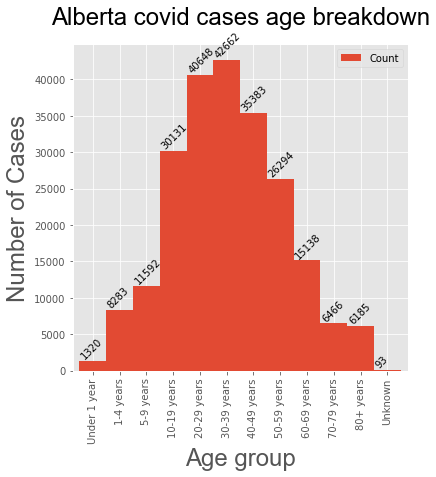

In [22]:
ax = gender_distr.plot.bar('Age group', y='Count', width=1.0)
f = plt.gcf()
f.set_size_inches(6, 6)

# stackoverflow code ayyy
for i, v in enumerate(gender_distr['Count']):
    ax.text(i-0.5, v+300, str(v), color='black', fontweight='regular', rotation=45)

# styling
plt.title('Alberta covid cases age breakdown', fontdict=csfont, pad=20.0)
plt.xlabel('Age group', fontdict=csfont)
plt.ylabel('Number of Cases', fontdict=csfont)
plt.show()
# ayy we plotted the distribution!! how cool.
# doesn't look REALLY good, but we got a lot of features, which is good.

# let's look at vaccination data

In [26]:
vac.head(10)

,Local Code,Age Group,Population,# of population with at least 1 dose,Percent of population who received at least one dose,# of population fully immunized,Percent of population fully immunized,Local Name,Zone Name
0,Z1.1.A.01,12-19 years,305,113,37.1,0,0.0,CROWSNEST PASS,SOUTH
1,Z1.1.A.01,20-39 years,1322,458,34.6,58,4.4,CROWSNEST PASS,SOUTH
2,Z1.1.A.01,40-59 years,1617,899,55.6,81,5.0,CROWSNEST PASS,SOUTH
3,Z1.1.A.01,60-74 years,1633,1243,76.1,107,6.6,CROWSNEST PASS,SOUTH
4,Z1.1.A.01,75+ years,618,504,81.6,426,69.0,CROWSNEST PASS,SOUTH
5,Z1.1.A.01,All age years,6358,3224,50.7,672,10.6,CROWSNEST PASS,SOUTH
6,Z1.1.A.02,12-19 years,489,228,46.7,7,1.4,PINCHER CREEK,SOUTH
7,Z1.1.A.02,20-39 years,1971,794,40.3,115,5.8,PINCHER CREEK,SOUTH
8,Z1.1.A.02,40-59 years,1929,1096,56.8,219,11.4,PINCHER CREEK,SOUTH
9,Z1.1.A.02,60-74 years,1749,1337,76.4,236,13.5,PINCHER CREEK,SOUTH


In [27]:
# oh so it's data for zones... interesting...
# let's see how many people in each zone have been given at least 1 dose.
vac['Zone Name'].value_counts()

NORTH       198
CALGARY     174
CENTRAL     174
EDMONTON    156
SOUTH        90
Name: Zone Name, dtype: int64

In [28]:
vac['Local Name'].value_counts()

BEAUMONT                      6
VULCAN                        6
WETASKIWIN COUNTY             6
EDMONTON - BONNIE DOON        6
TWO HILLS COUNTY              6
                             ..
VALLEYVIEW                    6
CALGARY - WEST                6
CALGARY - SW                  6
STRATHMORE                    6
STONY PLAIN & SPRUCE GROVE    6
Name: Local Name, Length: 132, dtype: int64

In [29]:
zone_df = vac[[v, '# of population with at least 1 dose', 'Zone Name']]
zone_df.head()

,Population,# of population with at least 1 dose,Zone Name
0,305,113,SOUTH
1,1322,458,SOUTH
2,1617,899,SOUTH
3,1633,1243,SOUTH
4,618,504,SOUTH


In [31]:
zone_df = zone_df.groupby(['Zone Name']).sum()

In [34]:
zone_df['% with 1 dose'] = zone_df['# of population with at least 1 dose'] / zone_df['Population']

In [35]:
zone_df.head()

,Population,# of population with at least 1 dose,% with 1 dose
Zone Name,,,
CALGARY,3160544,1716449,0.543087
CENTRAL,871529,403768,0.463287
EDMONTON,2663565,1497210,0.562108
NORTH,866997,351726,0.405683
SOUTH,568148,295129,0.519458


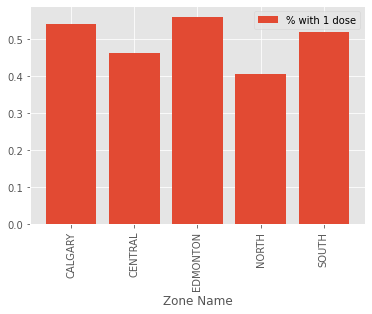

In [38]:
# Let's just visualize it, why not
ax = zone_df.plot.bar(y='% with 1 dose', width=0.8)